### Experiment 9

Design and implement Feed Forward Network (Multilayer Perceptron)

Dataset: MNIST

- MNIST stands for Modified National Institute of Standards and Technology.

- It’s a classic dataset for image classification tasks.

Data specifics:

 - Images: 28x28 grayscale images of handwritten digits (0–9).

- Training samples: 60,000 images.

- Test samples: 10,000 images.

Normalization: Pixel values are scaled from 0–255 to 0–1 (x_train / 255.0) to help the neural network learn faster.

Purpose: MNIST is widely used for benchmarking machine learning and deep learning models because it’s simple yet representative of image classification problems.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

2025-11-07 12:07:38.960809: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-07 12:07:39.018237: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-07 12:07:40.262302: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [2]:
# Load and prepare the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.2),  # Drop 20% neurons
    Dense(10, activation='softmax')
])

/home/aditya/ml_lab_IT2718/myenv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-11-07 12:07:41.699830: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [4]:
# Compile the model
model.compile(optimizer=Adam(),
              loss=SparseCategoricalCrossentropy(),
              metrics=[SparseCategoricalAccuracy()])

In [7]:
es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1, callbacks=[es])

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0448 - sparse_categorical_accuracy: 0.9853 - val_loss: 0.0720 - val_sparse_categorical_accuracy: 0.9810
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0406 - sparse_categorical_accuracy: 0.9865 - val_loss: 0.0644 - val_sparse_categorical_accuracy: 0.9827
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0399 - sparse_categorical_accuracy: 0.9865 - val_loss: 0.0754 - val_sparse_categorical_accuracy: 0.9803
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0354 - sparse_categorical_accuracy: 0.9884 - val_loss: 0.0709 - val_sparse_categorical_accuracy: 0.9818
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0329 - sparse_categorical_accuracy: 0.9887 - val_loss: 0.0707 - val_sparse_categorical_accuracy: 0.9842


In [8]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0680 - sparse_categorical_accuracy: 0.9805

Test accuracy: 0.9804999828338623


In [9]:
import matplotlib.pyplot as plt

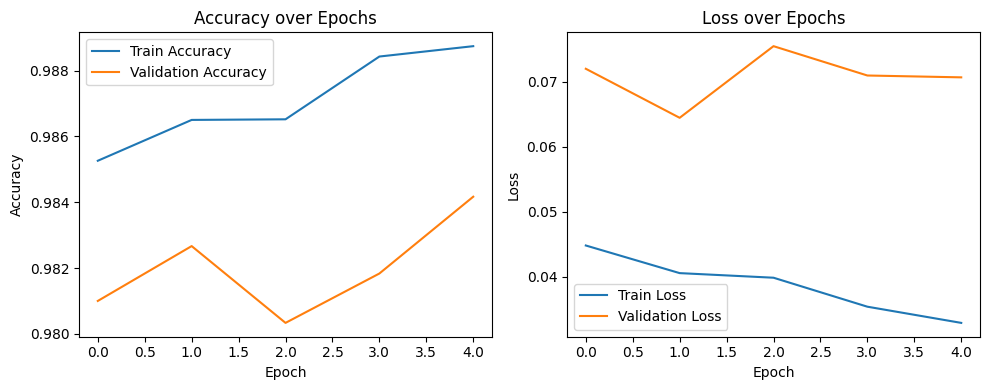

In [10]:
plt.figure(figsize=(10,4))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history.history['sparse_categorical_accuracy'], label='Train Accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history.get('val_loss', history.history['loss']), label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Implemented a simple MLP with:

- 1 hidden layer (128 neurons)

- ReLU activation

- Dropout (0.2)

- Output layer with softmax (10 classes)

- Training is controlled via Adam optimizer and early stopping.

- Visualization helps check learning curves.